

#  Titanic  Predictions

(This is a good and simple code for you)  

**Please consider upvoting if this is useful to you! :)**

**Contents
**
1-Import Necessary Libraries

2-Read In and Explore the Data

3-Data Analysis

4-Data Visualization

5-Cleaning Data

6-Building a Logistic Regression model

7-Train Test Split

8-Evaluation

# 1) Import Necessary Libraries

**1-1: data analysis libraries**

In [5]:
import numpy as np

import pandas as pd

**1-2: visualization libraries**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

In [7]:
import cufflinks as cf
cf.go_offline()

**2-Read our training and testing data**

**Importing our CSV files**

In [8]:
my_train_data = pd.read_csv("dataset/train.csv")
my_test_data = pd.read_csv("dataset/test.csv")

# Let's have a look at the datasets

**Data types, missing data and summary statistics**

Looking training data by describe() and info()

In [9]:
my_train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Nacessary Information (according to this table)


Survival: Survival (0 = No; 1 = Yes)

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name : Name

Sex : Sex

Age : Age

Sibsp : Number of Siblings/Spouses Aboard

Parch : Number of Parents/Children Aboard

Ticket : Ticket Number

Fare : Passenger Fare

Cabin : Cabin Number

Embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [10]:
print("Training set shape is: ", my_train_data.shape)
print("Test set shape is: ", my_test_data.shape)

Training set shape is:  (891, 12)
Test set shape is:  (418, 11)


In [11]:
my_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3-Data Analysis

whats up in our dataset

get a list of the features within the titanic dataset

In [12]:
print(my_train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [13]:
my_train_data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [14]:
my_train_data.info()
print('-'*40)
my_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**let go and watch useless values**

In [15]:
#Missing data in training set
pd.isnull(my_train_data).sum().sort_values(ascending = False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


* We can see that except for the abovementioned missing values, no NaN values exist.

<Axes: >

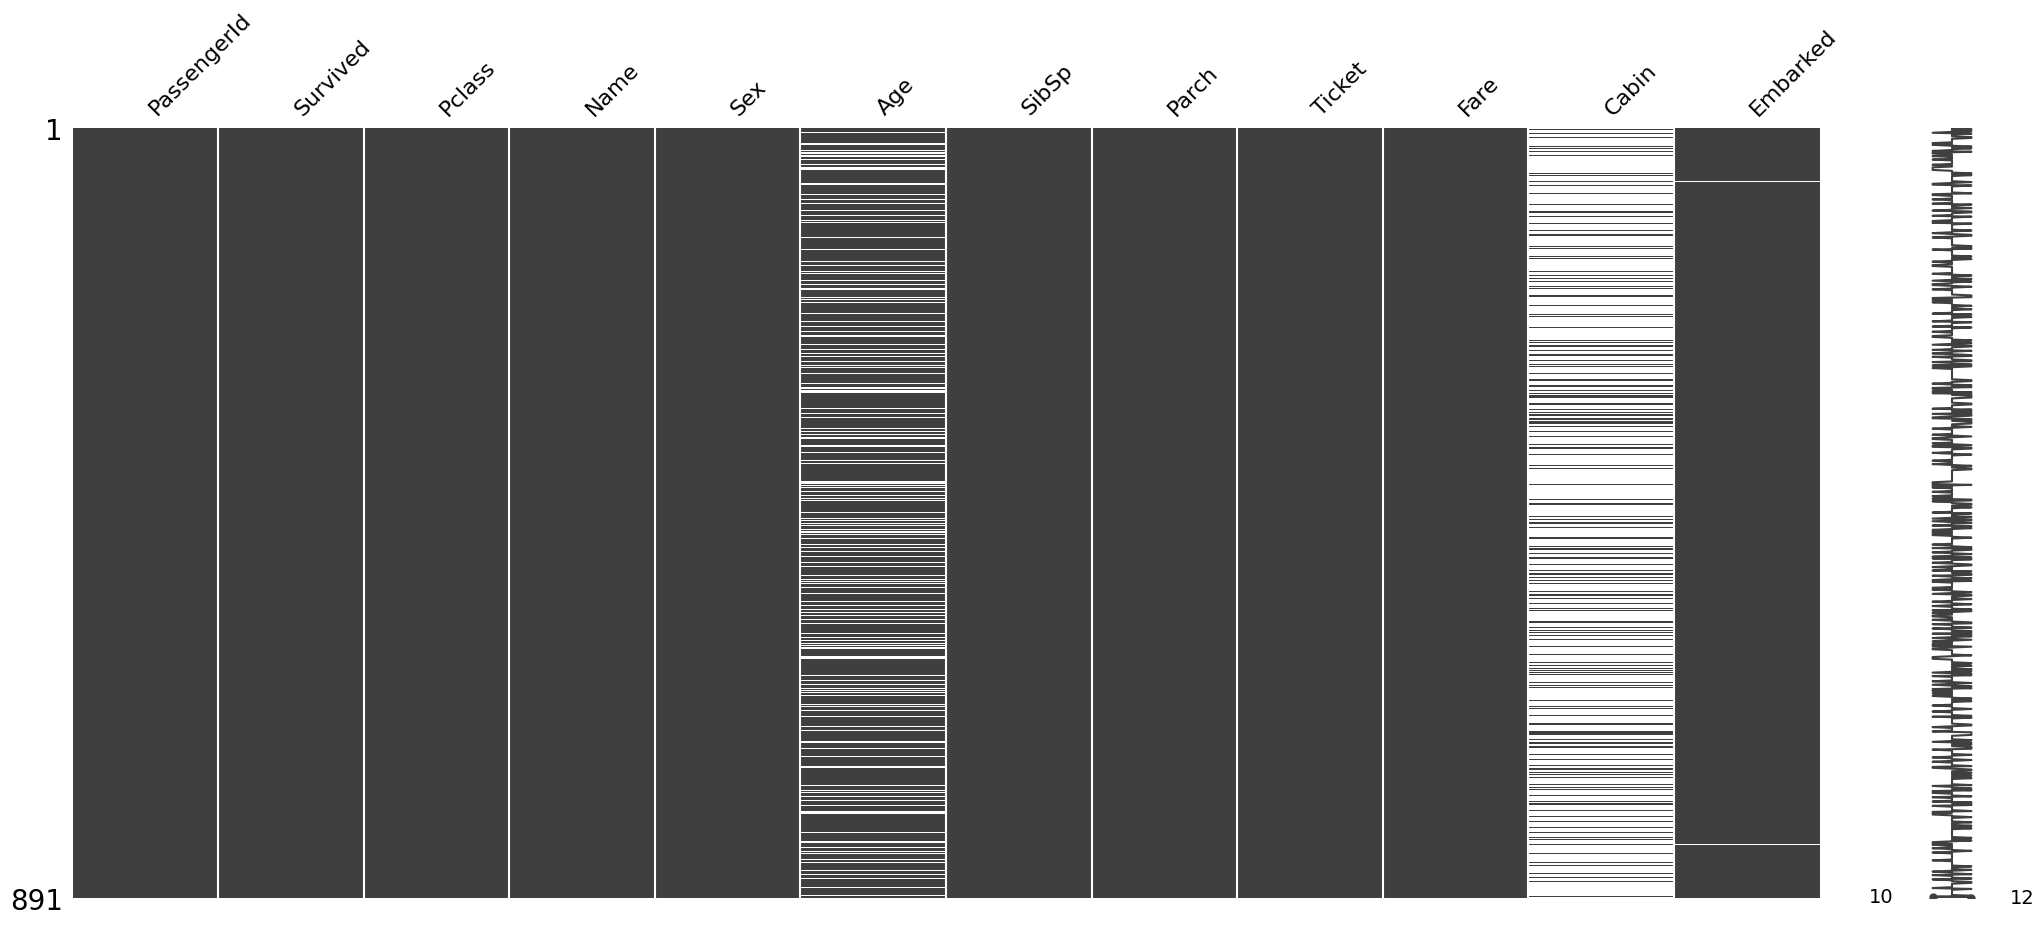

In [16]:
missingno.matrix(my_train_data)

In [17]:
#Missing data in testing set
my_test_data.isnull().sum().sort_values(ascending = False)

,0
Cabin,327
Age,86
Fare,1
Name,0
Pclass,0
PassengerId,0
Sex,0
Parch,0
SibSp,0
Ticket,0


<Axes: >

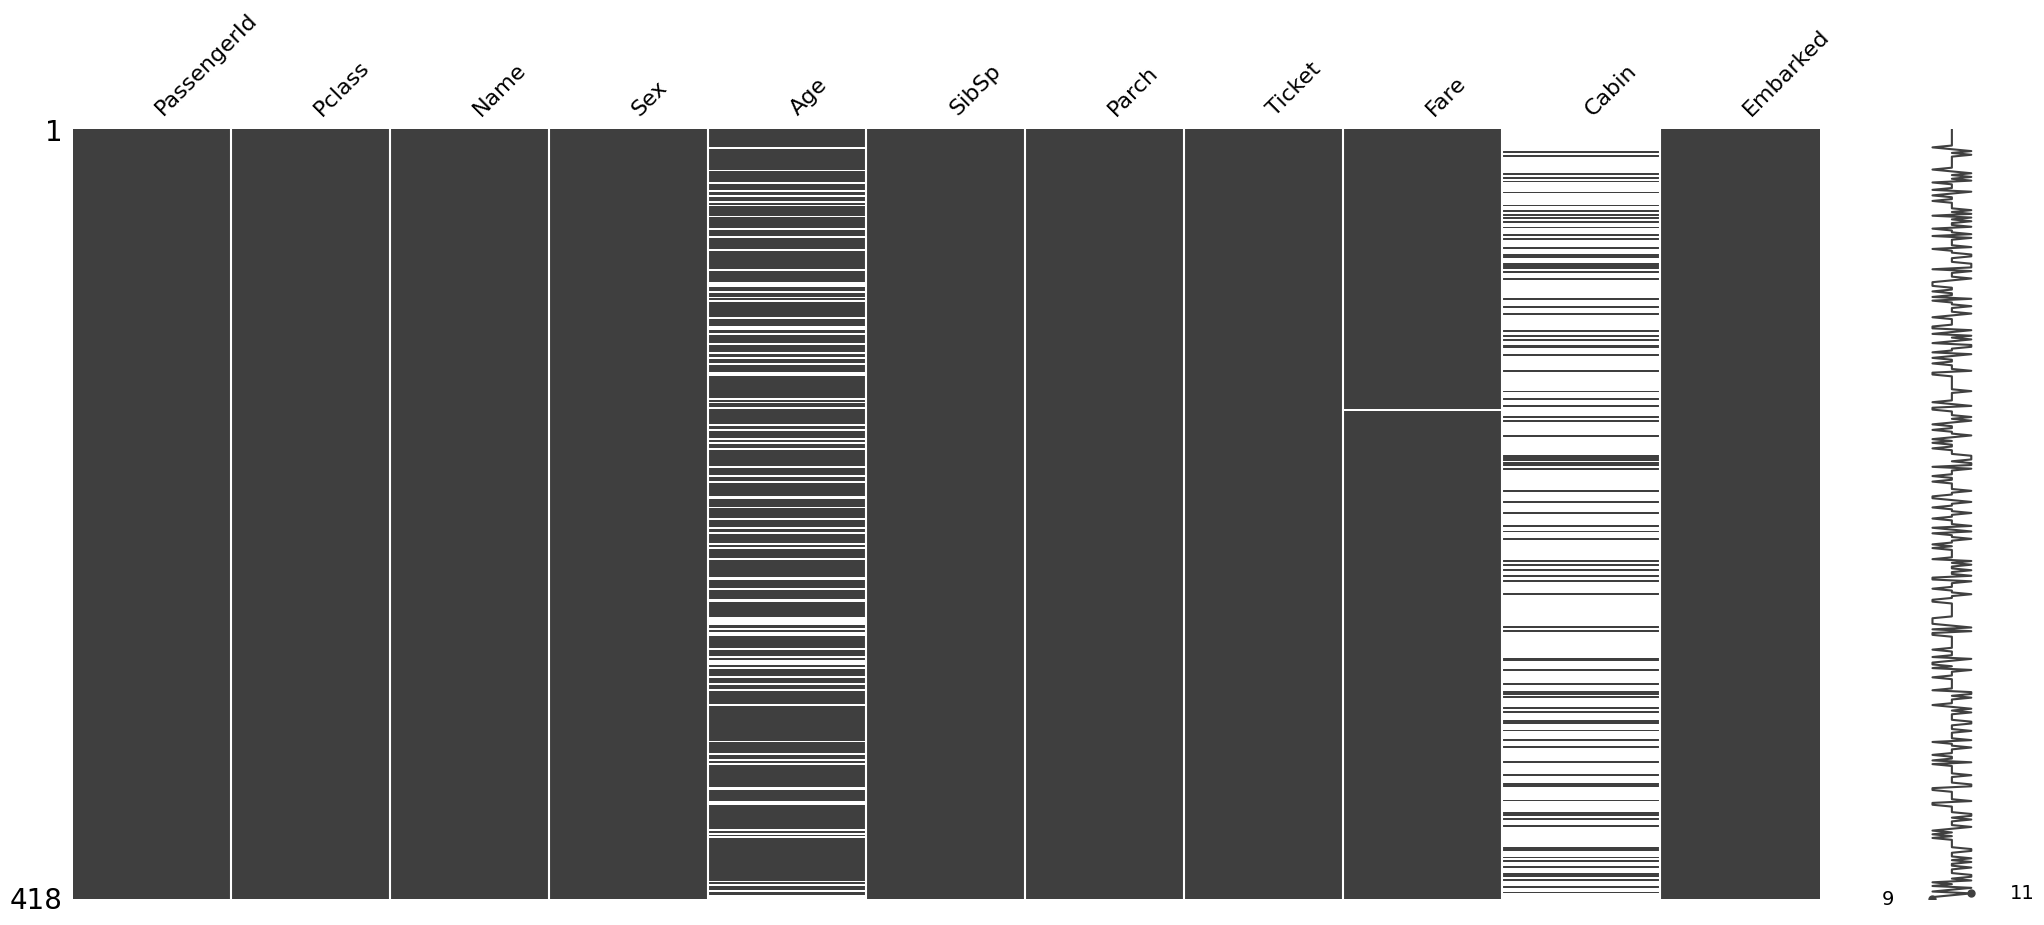

In [18]:
missingno.matrix(my_test_data)

# * **Categorical variables**

# A) SEX

Some Questions!

How many females survived the Titanic?

What was the survival rate on the Titanic?

In [19]:
print (my_train_data[["Sex", "Survived"]].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived', ascending = False))

      Sex  Survived
0  female  0.742038
1    male  0.188908


# B) Pclass

Some Questions!

Did anyone from 3rd class survived the Titanic?

In [20]:
my_train_data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [21]:
my_train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# C) Embarked

In [22]:
my_train_data['Embarked'].value_counts(dropna = False)
# Comment: Two missing values

,count
Embarked,
S,644
C,168
Q,77
NaN,2


In [23]:
my_train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# **4-Data Visualization**

**What was the survival rate on the Titanic(by Sex and Pclass)**

Survival Rate based on Sex and Pclass(passenger class (1st, 2nd, 3rd))

<ipython-input-24-1171acc14fce>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Sex', ylabel='Pclass'>

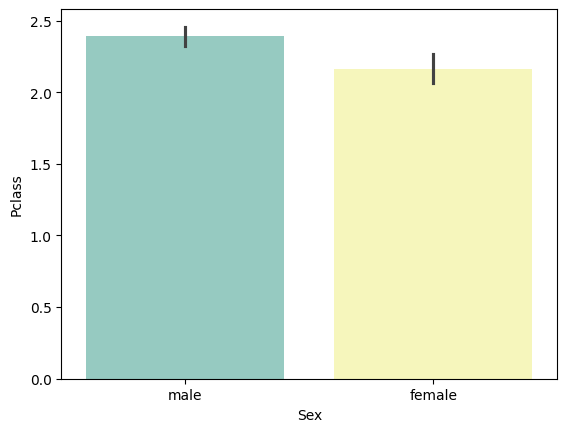

In [24]:
sns.barplot(x="Sex", y="Pclass", data=my_train_data,palette="Set3")

<ipython-input-25-343b8317cecd>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Sex', ylabel='count'>

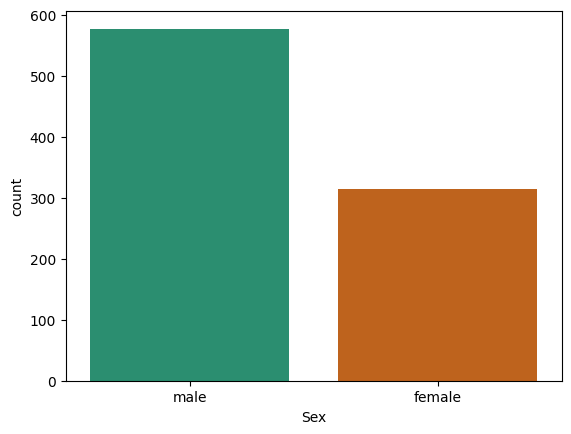

In [25]:
sns.countplot(x="Sex", data= my_train_data, palette="Dark2")

<ipython-input-26-939fb82bbe53>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Sex', ylabel='Survived'>

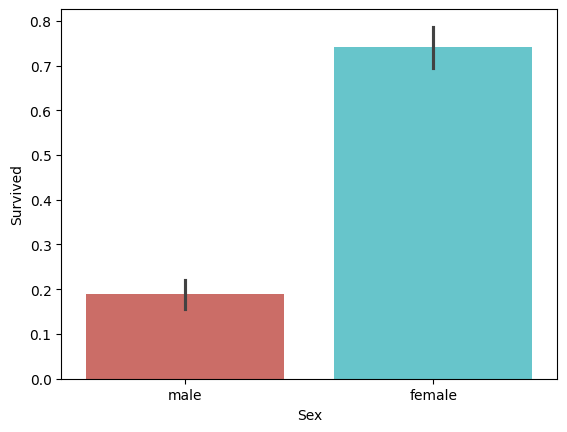

In [26]:
sns.barplot(x="Sex", y="Survived", data=my_train_data, palette="hls")

**This chart shows survival of passangers on the titanic(by Sex)**

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

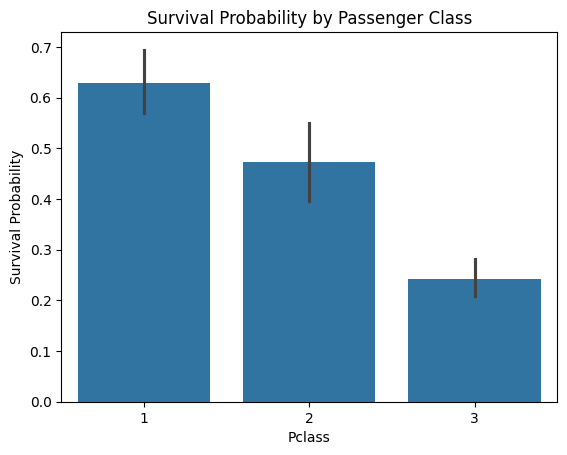

In [27]:
sns.barplot(x = 'Pclass', y ='Survived', data = my_train_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

In [28]:
se = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = my_train_data, kind = 'bar')
se.despine(left = False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

AttributeError: module 'seaborn' has no attribute 'factorplot'

<Axes: xlabel='Survived', ylabel='count'>

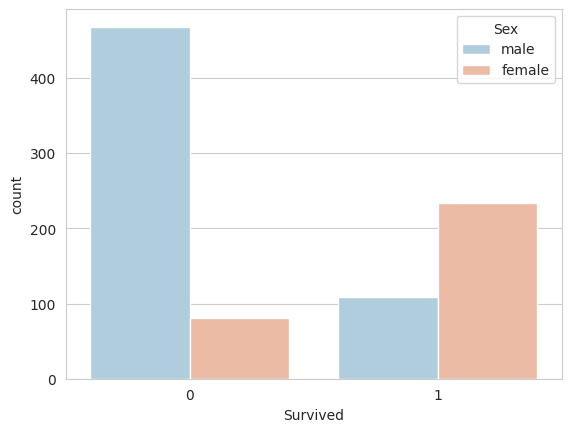

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=my_train_data,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

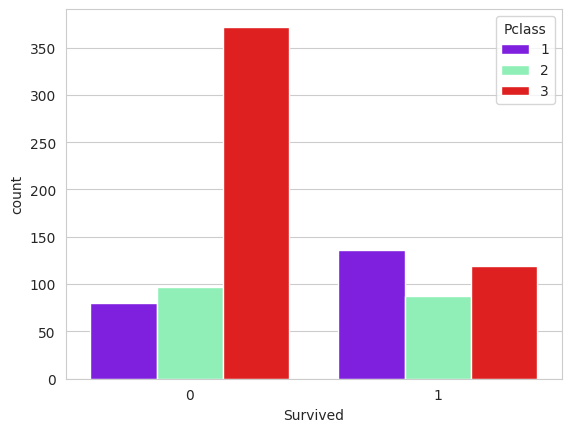

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=my_train_data,palette='rainbow')

**This box show Percentage of females who survived by using train data**

In [31]:
print("Percentage of females who Survived is=", my_train_data["Survived"][my_train_data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

Percentage of females who Survived is= 74.20382165605095


* Number of passengers saved by age

<ipython-input-32-01b354a25b91>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age'>

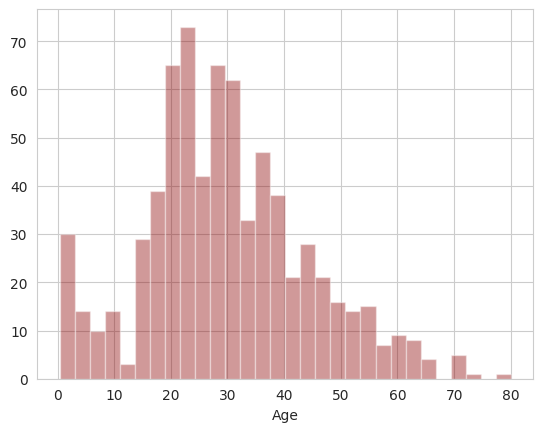

In [32]:
sns.distplot(my_train_data['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: >

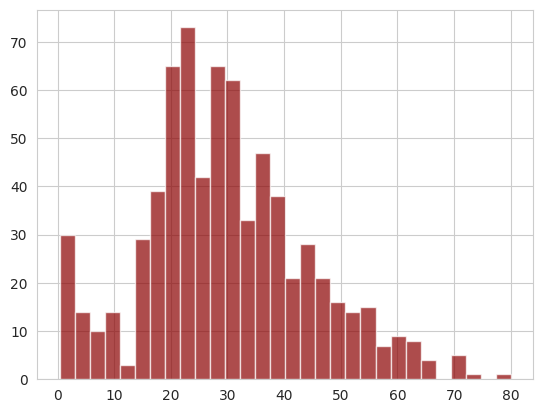

In [33]:
my_train_data['Age'].hist(bins=30,color='darkred',alpha=0.7)

* Number of passengers saved by SibSp

<Axes: xlabel='SibSp', ylabel='count'>

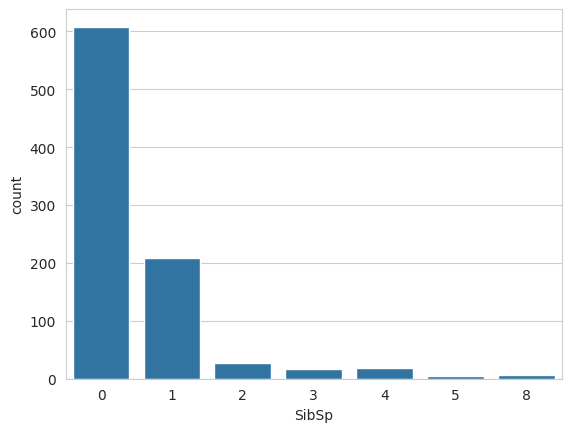

In [34]:
sns.countplot(x='SibSp',data=my_train_data)

In [35]:
print("Percentage of males who survived is=", my_train_data["Survived"][my_train_data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of males who survived is= 18.890814558058924


*  Ticket Prices for the Titanic

<Axes: >

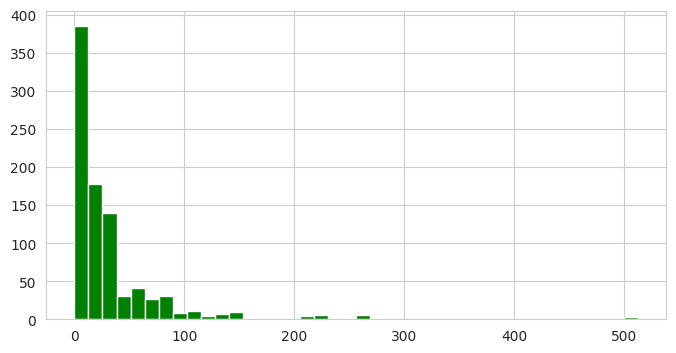

In [36]:
my_train_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Cufflinks:

Cufflinks is another library that connects the Pandas data frame with Plotly enabling users to create visualizations directly from Pandas

**Let's take a quick moment to show an example of cufflinks!**

In [37]:
my_train_data['Fare'].iplot(kind='hist',bins=30,color='green')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'rgba(0, 128, 0, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

**Data Cleaning**

* We want to fill in missing age data instead of just dropping the missing age data rows.

* One way to do this is by filling in the mean age of all the passengers (imputation).

* However we can be smarter about this and check the average age by passenger class. For example:

<ipython-input-38-bd61fac623e6>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

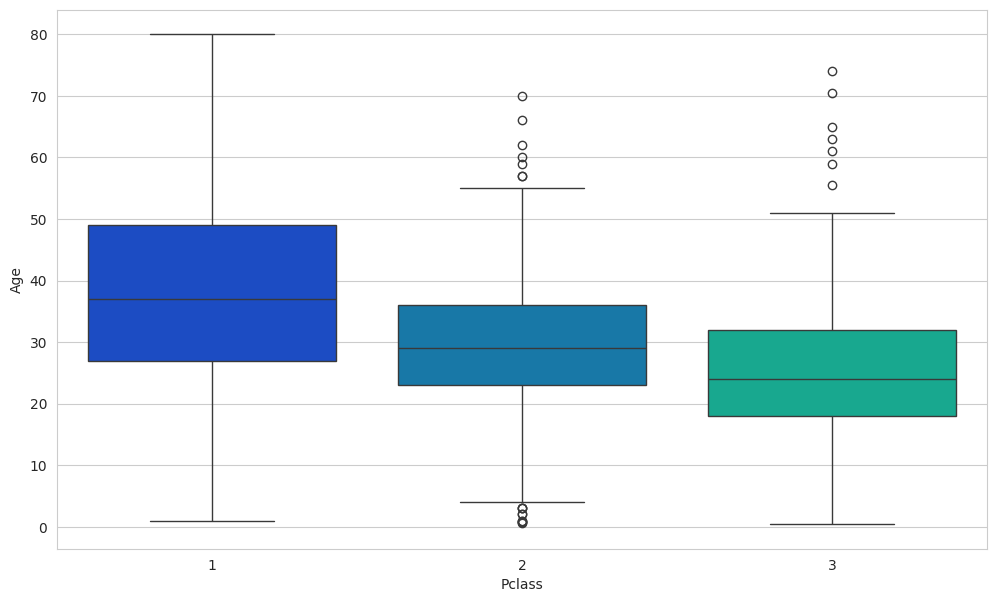

In [38]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=my_train_data,palette='winter')


We can see the wealthier passengers in the higher classes tend to be older,which makes sense.

We'll use these average age values to impute based on Pclass for Age.

In [39]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

**Now apply that function!**

In [40]:
my_train_data['Age'] = my_train_data[['Age','Pclass']].apply(impute_age,axis=1)

<ipython-input-39-9312ea158f5a>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-39-9312ea158f5a>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



**Now let's check that heat map again!**

<Axes: >

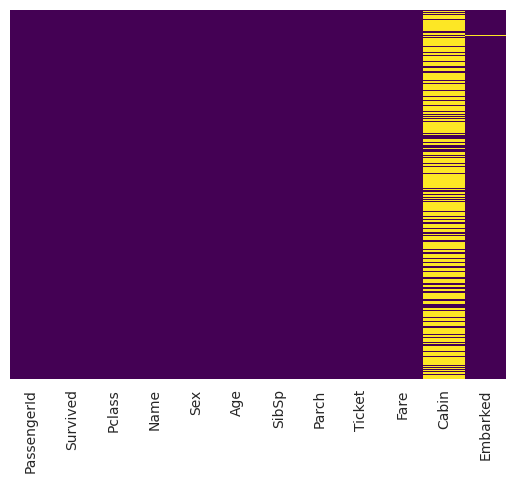

In [41]:
sns.heatmap(my_train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.**

In [42]:
my_train_data.drop('Cabin',axis=1,inplace=True)

In [43]:
my_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [44]:
my_train_data.dropna(inplace=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


**Converting Categorical Features:**

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [45]:
my_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [46]:
sex = pd.get_dummies(my_train_data['Sex'],drop_first=True)
embark = pd.get_dummies(my_train_data['Embarked'],drop_first=True)

In [47]:
my_train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [48]:
my_train_data = pd.concat([my_train_data,sex,embark],axis=1)

In [49]:
my_train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


**Great! Our data is ready for our model!
**
# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.
# Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(my_train_data.drop('Survived',axis=1),
                                                    my_train_data['Survived'], test_size=0.30,
                                                    random_state=101)

# Training and Predicting

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [54]:
predictions = logmodel.predict(X_test)


**Let's move on to evaluate our model!**

# Evaluation

We can check precision,recall,f1-score using classification report!

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



****Please consider upvoting if this is useful to you!****